<a href="https://colab.research.google.com/github/rabulhasan/our_project/blob/main/project_3120.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Equities (and other assets) vs the S&P 500
The goal of this project is to import data from an online source and process the data using various python libraries. Your group will choose five distinct equities or assets in different classes. A regression analysis on each of the asset against the S&P 500 will determine if there is any correlation. Submit the final project as a single Jupyter notebook file (.ipynb).
###Collecting Data
- Choose five distinct equities or assets (oil, gold, bonds, currency pairs, bitcoins, etc…). Verify there is data available to import from Quandl, Alpha Vantage or Yahoo Finance.
- Import daily prices (adj closing or spot) for all five assets. Use 1/1/2022 as the start date and 12/31/2022 as the end date. Display the first 5 rows and the total count for each asset.
- Import daily prices for the S&P 500. Use 1/1/2022 as the start date and 12/31/2022 as the end date. Display the first 5 rows and the total count of the S&P.

###Processing Data

- Calculate daily % change (adj closing or spot) for each of the asset and the S&P. Display the first 5 rows and the total count for each data set.
- Plot the daily % change (adj closing or spot) data using a bar graph for each asset.
- Calculate and display the mean, standard deviation, variance, min, and max for each set of data.

###Regression Analysis

- Using scikit-learn, perform five linear regressions for each of the five assets against the S&P 500. Y should be % change S&P 500. X should be % change for each asset.
- For each regression, plot the samples and the linear model. Label the Y axis as S&P 500 and the X axis as each asset.
- Calculate and display the intercept, coefficient (slope), R2, and the Mean squared error.
Which asset is highly correlated with the S&P 500 and which asset is the least correlated?
 

## Collecting data

In [20]:
#import liberies
import yfinance as yf
# Import the plotting library
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:


# Download historical data for Apple stock, gold prices, Bitcoin, crude oil, and the Euro/US Dollar exchange rate
aapl = yf.download("AAPL", start="2022-01-01", end="2022-12-31")
gold = yf.download("GC=F", start="2022-01-01", end="2022-12-31")
btc = yf.download("BTC-USD", start="2022-01-01", end="2022-12-31")
oil = yf.download("CL=F", start="2022-01-01", end="2022-12-31")
eurusd = yf.download("EURUSD=X", start="2022-01-01", end="2022-12-31")

# Print the first 5 rows of the Apple stock data
print('\n_________________________\n apple stock \n_________________________\n')
print(aapl.head())

# Print the first 5 rows of the gold data
print('\n_________________________\n gold\n_________________________\n')
print(gold.head())

# Print the first 5 rows of the Bitcoin data
print('\n_________________________\n bitcoin\n_________________________\n')
print(btc.head())

# Print the first 5 rows of the crude oil data

print('\n_________________________\n oil\n_________________________\n')
print(oil.head())

# Print the first 5 rows of the Euro/US Dollar exchange rate data

print('\n_________________________\n euro\n_________________________\n')
print(eurusd.head())

#total count
print(f'Total number of trading days for aaple: {len(aapl)}\n')
print(f'Total number of trading days for gold: {len(gold)}\n')
print(f'Total number of trading days for bitcoin: {len(btc)}\n')
print(f'Total number of trading days for oil: {len(oil)}\n')
print(f'Total number of trading days for euro: {len(eurusd)}')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

_________________________
 apple stock 
_________________________

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  177.830002  182.880005  177.710007  182.009995  180.683868   
2022-01-04  182.630005  182.940002  179.119995  179.699997  178.390686   
2022-01-05  179.610001  180.169998  174.639999  174.919998  173.645538   
2022-01-06  172.699997  175.300003  171.639999  172.000000  170.746796   
2022-01-07  172.889999  174.139999  171.029999  172.169998  170.915573   

               Volume  
Date                   
2022-01-03  10448790

In [28]:
# Download the S&P 500 index data
spy = yf.download('^GSPC', start='2022-01-01', end='2022-12-31', auto_adjust=True)

# Print the first five rows of the data
print(spy.head())

# Get the total number of trading days
num_trading_days = len(spy)

# Print the result
print(f'\n----------------------------------------------------------\n Total number of trading days for S&P 500 in 2022: {num_trading_days}')


[*********************100%***********************]  1 of 1 completed
                   Open         High          Low        Close      Volume
Date                                                                      
2022-01-03  4778.140137  4796.640137  4758.169922  4796.560059  3831020000
2022-01-04  4804.509766  4818.620117  4774.270020  4793.540039  4683170000
2022-01-05  4787.990234  4797.700195  4699.439941  4700.580078  4887960000
2022-01-06  4693.390137  4725.009766  4671.259766  4696.049805  4295280000
2022-01-07  4697.660156  4707.950195  4662.740234  4677.029785  4181510000

----------------------------------------------------------
 Total number of trading days for S&P 500 in 2022: 251


## Procecing data

In [34]:
# Calculate daily percentage change for Apple stock
aapl_daily_return = aapl['Close'].pct_change()

# Calculate daily percentage change for gold prices
gold_daily_return = gold['Close'].pct_change()

# Calculate daily percentage change for Bitcoin
btc_daily_return = btc['Close'].pct_change()

# Calculate daily percentage change for crude oil
oil_daily_return = oil['Close'].pct_change()

# Calculate daily percentage change for Euro/US Dollar exchange rate
eurusd_daily_return = eurusd['Close'].pct_change()

# Calculate daily percentage change for the S&P 500 index
spy_daily_return = spy['Close'].pct_change()

# Print the first 5 rows of each dataset
print('AAPL daily return:')
print(aapl_daily_return.head())
print('Gold daily return:')
print(gold_daily_return.head())
print('BTC daily return:')
print(btc_daily_return.head())
print('Oil daily return:')
print(oil_daily_return.head())
print('EUR/USD daily return:')
print(eurusd_daily_return.head())
print('S&P 500 daily return:')
print(spy_daily_return.head())

# Print the total count for each dataset
print('\nAAPL total count:', len(aapl_daily_return))
print('Gold total count:', len(gold_daily_return))
print('BTC total count:', len(btc_daily_return))
print('Oil total count:', len(oil_daily_return))
print('EUR/USD total count:', len(eurusd_daily_return))
print('S&P 500 total count:', len(spy_daily_return))


AAPL daily return:
Date
2022-01-03         NaN
2022-01-04   -0.012692
2022-01-05   -0.026600
2022-01-06   -0.016693
2022-01-07    0.000988
Name: Close, dtype: float64
Gold daily return:
Date
2022-01-03         NaN
2022-01-04    0.008114
2022-01-05    0.005843
2022-01-06   -0.019676
2022-01-07    0.004640
Name: Close, dtype: float64
BTC daily return:
Date
2022-01-01         NaN
2022-01-02   -0.007163
2022-01-03   -0.018737
2022-01-04   -0.012066
2022-01-05   -0.050734
Name: Close, dtype: float64
Oil daily return:
Date
2022-01-03         NaN
2022-01-04    0.011961
2022-01-05    0.011170
2022-01-06    0.020681
2022-01-07   -0.007048
Name: Close, dtype: float64
EUR/USD daily return:
Date
2022-01-03         NaN
2022-01-04   -0.006261
2022-01-05   -0.001647
2022-01-06    0.002647
2022-01-07   -0.001469
Name: Close, dtype: float64
S&P 500 daily return:
Date
2022-01-03         NaN
2022-01-04   -0.000630
2022-01-05   -0.019393
2022-01-06   -0.000964
2022-01-07   -0.004050
Name: Close, dtype: fl

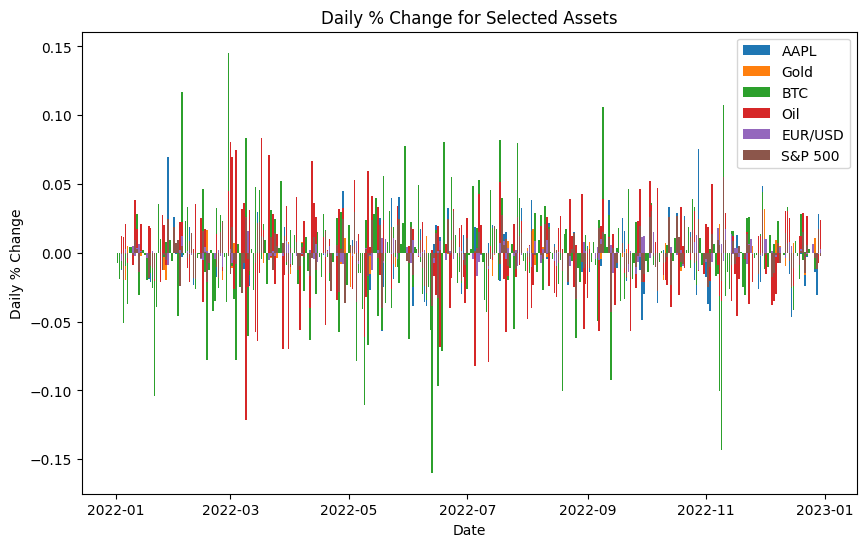

In [35]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the daily percentage change for each asset using a bar graph
plt.bar(aapl_daily_return.index, aapl_daily_return.values, label='AAPL')
plt.bar(gold_daily_return.index, gold_daily_return.values, label='Gold')
plt.bar(btc_daily_return.index, btc_daily_return.values, label='BTC')
plt.bar(oil_daily_return.index, oil_daily_return.values, label='Oil')
plt.bar(eurusd_daily_return.index, eurusd_daily_return.values, label='EUR/USD')
plt.bar(spy_daily_return.index, spy_daily_return.values, label='S&P 500')

# Add a legend and labels
plt.legend()
plt.xlabel('Date')
plt.ylabel('Daily % Change')
plt.title('Daily % Change for Selected Assets')

# Show the plot
plt.show()


In [36]:
# Calculate and display mean, standard deviation, variance, min, and max for each dataset

print('AAPL daily return:')
print(f"Mean: {aapl_daily_return.mean()}")
print(f"Standard Deviation: {aapl_daily_return.std()}")
print(f"Variance: {aapl_daily_return.var()}")
print(f"Min: {aapl_daily_return.min()}")
print(f"Max: {aapl_daily_return.max()}")

print('\nGold daily return:')
print(f"Mean: {gold_daily_return.mean()}")
print(f"Standard Deviation: {gold_daily_return.std()}")
print(f"Variance: {gold_daily_return.var()}")
print(f"Min: {gold_daily_return.min()}")
print(f"Max: {gold_daily_return.max()}")

print('\nBTC daily return:')
print(f"Mean: {btc_daily_return.mean()}")
print(f"Standard Deviation: {btc_daily_return.std()}")
print(f"Variance: {btc_daily_return.var()}")
print(f"Min: {btc_daily_return.min()}")
print(f"Max: {btc_daily_return.max()}")

print('\nOil daily return:')
print(f"Mean: {oil_daily_return.mean()}")
print(f"Standard Deviation: {oil_daily_return.std()}")
print(f"Variance: {oil_daily_return.var()}")
print(f"Min: {oil_daily_return.min()}")
print(f"Max: {oil_daily_return.max()}")

print('\nEUR/USD daily return:')
print(f"Mean: {eurusd_daily_return.mean()}")
print(f"Standard Deviation: {eurusd_daily_return.std()}")
print(f"Variance: {eurusd_daily_return.var()}")
print(f"Min: {eurusd_daily_return.min()}")
print(f"Max: {eurusd_daily_return.max()}")

print('\nS&P 500 daily return:')
print(f"Mean: {spy_daily_return.mean()}")
print(f"Standard Deviation: {spy_daily_return.std()}")
print(f"Variance: {spy_daily_return.var()}")
print(f"Min: {spy_daily_return.min()}")
print(f"Max: {spy_daily_return.max()}")


AAPL daily return:
Mean: -0.0010966302389079968
Standard Deviation: 0.022470985769036427
Variance: 0.0005049452014322376
Min: -0.05867953721882391
Max: 0.08897457132383879

Gold daily return:
Mean: 9.2085644030246e-05
Standard Deviation: 0.009738527959782332
Variance: 9.483892682346225e-05
Min: -0.026567301514872188
Max: 0.03155783252344646

BTC daily return:
Mean: -0.002342322331245613
Standard Deviation: 0.033307766907406
Variance: 0.0011094073363580904
Min: -0.15974726027617203
Max: 0.1454118392886461

Oil daily return:
Mean: 0.0006748538050886645
Standard Deviation: 0.03033209843973118
Variance: 0.0009200361957575426
Min: -0.12126111859385258
Max: 0.08354379592718453

EUR/USD daily return:
Mean: -0.00023090263979186514
Standard Deviation: 0.006164869474073563
Variance: 3.800561563236405e-05
Min: -0.017377526810348876
Max: 0.018378184728221614

S&P 500 daily return:
Mean: -0.0007739196925590548
Standard Deviation: 0.01525174155961099
Variance: 0.0002326156206011651
Min: -0.043236613

## Regression Analysis